In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [116]:
df = pd.read_csv('Database/Daily_Activity.csv')   

In [117]:
# names of columns
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [118]:
# nunique() will return the number of unique elements in the object
df['Id'].nunique()

33

In [119]:
cols = ['Id', 'ActivityDate', 'TotalSteps', 'LightActiveDistance', 'SedentaryActiveDistance', 'FairlyActiveMinutes', 'SedentaryMinutes', 'Calories']
df =df[cols]

In [120]:
df.rename(columns={'ActivityDate': 'Date'}, inplace=True)

In [121]:
df['TotalMinutes'] = df['FairlyActiveMinutes'] + df['SedentaryMinutes'] + df['LightActiveDistance'] 

In [122]:
df['TotalHours'] = df['TotalMinutes'] / 60

In [123]:
df['Date'] = pd.to_datetime(df['Date'])

In [124]:
df['day'] = df['Date'].dt.day_name()

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Id                       940 non-null    int64         
 1   Date                     940 non-null    datetime64[ns]
 2   TotalSteps               940 non-null    int64         
 3   LightActiveDistance      940 non-null    float64       
 4   SedentaryActiveDistance  940 non-null    float64       
 5   FairlyActiveMinutes      940 non-null    int64         
 6   SedentaryMinutes         940 non-null    int64         
 7   Calories                 940 non-null    int64         
 8   TotalMinutes             940 non-null    float64       
 9   TotalHours               940 non-null    float64       
 10  day                      940 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 80.9+ KB


In [126]:
df.isnull().sum()

Id                         0
Date                       0
TotalSteps                 0
LightActiveDistance        0
SedentaryActiveDistance    0
FairlyActiveMinutes        0
SedentaryMinutes           0
Calories                   0
TotalMinutes               0
TotalHours                 0
day                        0
dtype: int64

In [127]:
df.describe()

,Id,Date,TotalSteps,LightActiveDistance,SedentaryActiveDistance,FairlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,3.340819,0.001606,13.564894,991.210638,2303.609574,1008.116351,16.801939
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000167
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,1.945000,0.000000,0.000000,729.750000,1828.500000,751.575000,12.526250
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,3.365000,0.000000,6.000000,1057.500000,2134.000000,1081.205000,18.020083
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,4.782500,0.000000,19.000000,1229.500000,2793.250000,1241.997500,20.699958
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,10.710000,0.110000,143.000000,1440.000000,4900.000000,1440.000000,24.000000
std,2.424805e+09,NaN,5087.150742,2.040655,0.007346,19.987404,301.267437,718.166862,296.336977,4.938950


Text(0.5, 1.0, 'Total Steps')

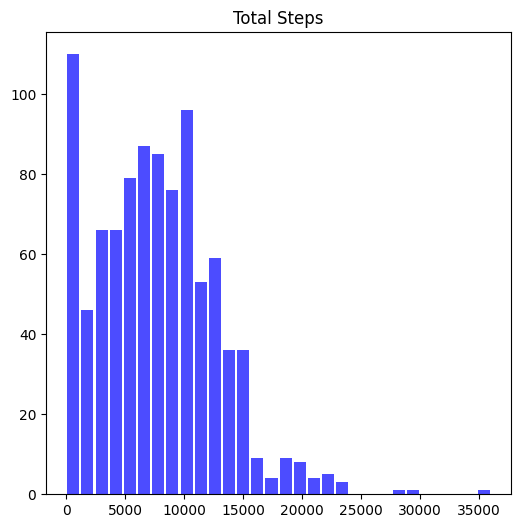

In [128]:
plt.figure(figsize=(6, 6))
plt.hist(x=df['TotalSteps'], bins=30, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Total Steps')

Text(0.5, 1.0, 'Activity by Day')

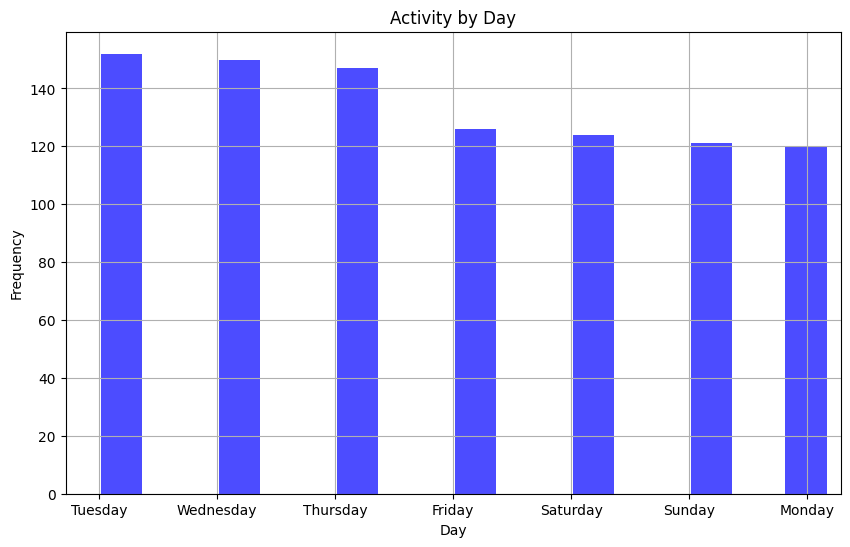

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(x=df.day, bins=30, width=0.35,color='blue', alpha=0.7, rwidth=0.85)
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Activity by Day')

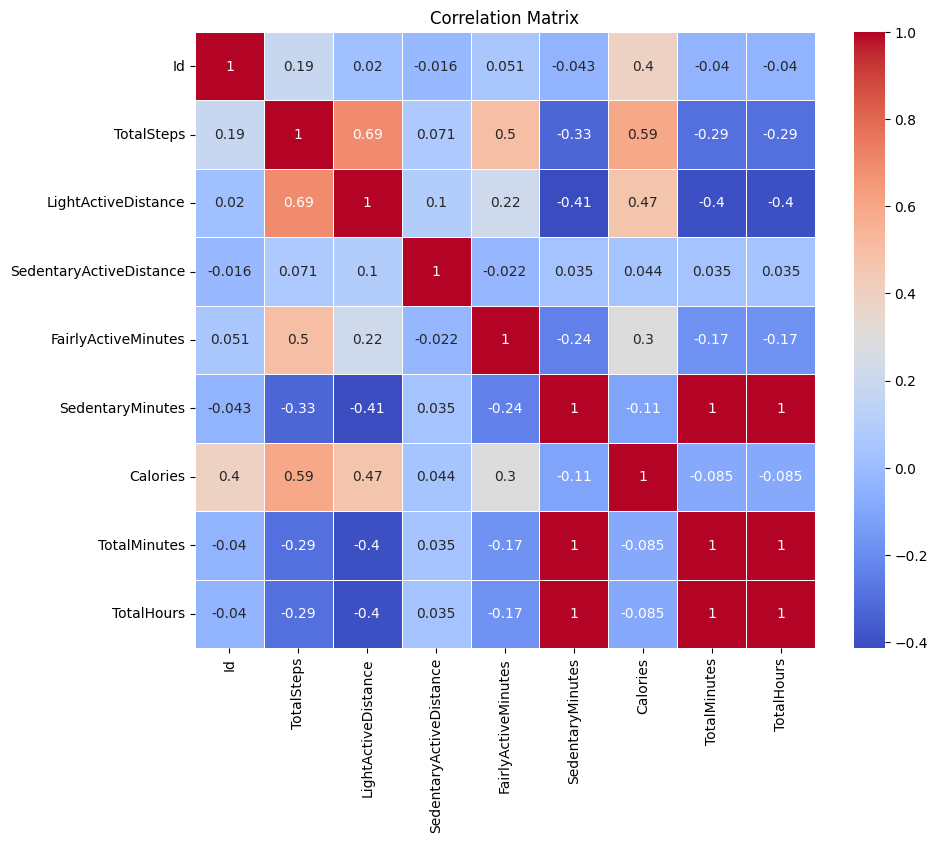

In [131]:
# Ensure df is defined and contains numeric data
if 'df' in locals() or 'df' in globals():
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    if not numeric_df.empty:
        plt.figure(figsize=(10, 8))  # Adjust the figure size
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()
    else:
        print("DataFrame does not contain numeric columns for correlation.")
else:
    print("DataFrame 'df' is not defined.")

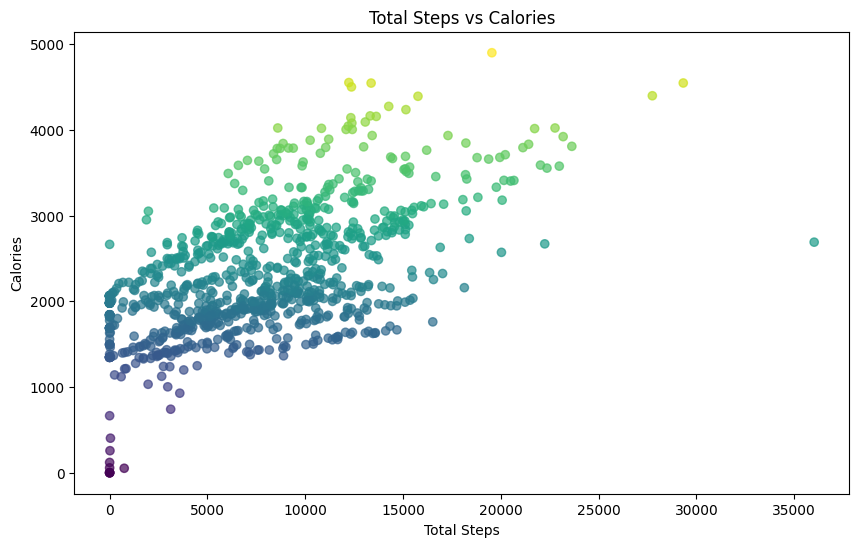

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['TotalSteps'], y=df['Calories'], c=df['Calories'], alpha=0.7)
plt.title('Total Steps vs Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()